<a href="https://colab.research.google.com/github/shreyansh273/Football-Scouting/blob/main/player_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from adjustText import adjust_text

In [2]:
from google.colab import files
files = files.upload()

Saving all_players_stats (2).csv to all_players_stats (2).csv


In [3]:
from google.colab import files
files = files.upload()

Saving players_value.csv to players_value.csv


In [4]:
player_value = pd.read_csv("players_value.csv")
player_value.drop("Unnamed: 0", axis=1, inplace=True)
player_value.head(1)

,Name,Field Position,Age,Market Value (Millions)
0,Pedro Henrique,Left Winger,31,1.08


In [65]:
player_stats = pd.read_csv("all_players_stats (2).csv")
player_stats.drop("Unnamed: 0", axis=1, inplace=True)
player_stats.head(1)

,player,nationality,position,squad,age,birth_year,games,games_starts,minutes,minutes_90s,goals,assists,non_penalty_goals,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,npxg_xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,shots_total,shots_on_target,shots_on_target_pct,shots_total_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,distance_from_goal,shots_free_kicks,...,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,progressive_carries,carries_into_final_third,carries_into_penalty_area,miscontrols,dispossessed,pass_targets,passes_received,passes_received_pct,progressive_passes_received,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,sca_og_for,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,League
0,Max Aarons,eng ENG,DF,Norwich City,21-309,2000,11,11,990,11.0,0,0,0,0,0,3,0,0.0,0.0,0.0,0.0,0.0,0.3,0.3,0.7,1.0,0.03,0.06,0.09,0.03,0.09,8,1,12.5,0.73,0.09,0.0,0.0,21.7,0,...,52,228,253,143,10,474,16,35,45.7,17,3,348,1990,1267,50,18,4,10,10,382,327,85.6,16,15,1.36,12,0,1,1,1,0,2,0.18,2,0,0,0,0,0,Premier-League


In [66]:
player_stats[player_stats.player.str.contains("Pedro")]

,player,nationality,position,squad,age,birth_year,games,games_starts,minutes,minutes_90s,goals,assists,non_penalty_goals,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,npxg_xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,shots_total,shots_on_target,shots_on_target_pct,shots_total_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,distance_from_goal,shots_free_kicks,...,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,progressive_carries,carries_into_final_third,carries_into_penalty_area,miscontrols,dispossessed,pass_targets,passes_received,passes_received_pct,progressive_passes_received,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,sca_og_for,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,League
302,João Pedro,br BRA,"MF,FW",Watford,20-044,2001,6,1,182,2.0,0,1,0,0,0,1,0,0.00,0.49,0.49,0.00,0.49,0.2,0.2,1.2,1.3,0.08,0.57,0.65,0.08,0.65,2,0,0.0,0.99,0.00,0.00,NaN,21.5,0,...,2,13,39,45,6,94,4,10,40.0,4,0,62,307,142,5,2,2,6,7,91,67,73.6,5,8,3.96,7,0,0,1,0,0,3,1.48,2,0,0,1,0,0,Premier-League
541,Pedro Chirivella,es ESP,MF,Nantes,24-170,1997,12,12,1031,11.5,2,1,2,0,0,2,0,0.17,0.09,0.26,0.17,0.26,0.5,0.5,0.5,1.0,0.04,0.04,0.09,0.04,0.09,6,2,33.3,0.52,0.17,0.33,1.00,19.8,0,...,7,109,428,122,9,623,3,4,75.0,3,0,342,1378,612,27,5,1,3,4,481,451,93.8,23,19,1.66,19,0,0,0,0,0,2,0.17,2,0,0,0,0,0,Ligue-1
1697,Pedro,es ESP,FW,Lazio,34-104,1987,12,11,900,10.0,4,2,4,0,0,1,0,0.40,0.20,0.60,0.40,0.60,2.3,2.3,1.5,3.8,0.23,0.15,0.38,0.23,0.38,15,9,60.0,1.50,0.90,0.27,0.44,14.2,0,...,8,84,291,227,40,540,12,23,52.2,12,2,437,2530,1486,90,35,9,24,6,532,440,82.7,50,29,2.90,23,0,2,2,2,0,5,0.50,5,0,0,0,0,0,Serie-A
1698,João Pedro,br BRA,FW,Cagliari,29-245,1992,12,12,1077,12.0,7,2,5,2,2,3,0,0.58,0.17,0.75,0.42,0.58,4.5,2.9,1.1,4.1,0.37,0.09,0.47,0.25,0.34,21,11,52.4,1.75,0.92,0.24,0.45,14.6,0,...,11,33,172,152,45,323,6,14,42.9,6,1,218,1311,600,27,8,1,24,18,450,246,54.7,67,22,1.84,17,0,1,2,1,1,4,0.33,3,0,1,0,0,0,Serie-A
1920,Pedro Benito,es ESP,FW,Cádiz,21-227,2000,1,0,31,0.3,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0,0,NaN,0.00,0.00,NaN,NaN,NaN,0,...,0,0,6,2,0,8,0,0,NaN,0,0,4,29,18,1,0,0,2,0,18,7,38.9,0,0,0.00,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0,La-Liga
1923,Pedro Bigas,es ESP,DF,Elche,31-055,1990,8,8,682,7.6,0,0,0,0,0,2,0,0.00,0.00,0.00,0.00,0.00,0.1,0.1,0.1,0.2,0.02,0.01,0.03,0.02,0.03,2,1,50.0,0.26,0.13,0.00,0.00,7.5,0,...,71,296,221,13,4,485,0,1,0.0,0,0,313,1525,822,23,1,0,2,0,359,352,98.1,4,3,0.40,2,0,0,0,1,0,0,0.00,0,0,0,0,0,0,La-Liga
2220,Pedro Ortiz,es ESP,MF,Sevilla,21-082,2000,1,0,7,0.1,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.4,0.4,0.4,0.7,4.70,4.92,9.63,4.70,9.63,1,1,100.0,12.86,12.86,0.00,0.00,8.0,0,...,1,2,9,5,1,16,0,0,NaN,0,0,12,34,25,1,0,0,0,0,14,14,100.0,0,2,25.71,2,0,0,0,0,0,0,0.00,0,0,0,0,0,0,La-Liga
2233,Pedrosa,es ESP,DF,Espanyol,23-180,1998,12,12,1035,11.5,1,1,1,0,0,2,0,0.09,0.09,0.17,0.09,0.17,0.4,0.4,1.2,1.6,0.03,0.10,0.14,0.03,0.14,12,3,25.0,1.04,0.26,0.08,0.33,22.6,0,...,58,212,275,180,21,528,18,32,56.3,19,2,363,2272,1484,55,21,9,22,13,366,329,89.9,23,17,1.48,13,1,2,0,1,0,2,0.17,2,0,0,0,0,0,La-Liga


In [67]:
player_stats2 = player_stats.copy()
cols = player_stats2.columns[26:len(player_stats2.columns)-4].to_list()
for i in range(len(cols)):
  if ('per90' in cols[i]) or ('pct' in cols[i]):
    continue
  else:
    player_stats2[cols[i]+"_per90"] = player_stats2[cols[i]]/player_stats2["minutes_90s"]
    player_stats2.drop(cols[i], axis=1, inplace=True)
player_stats2["League"] = player_stats["League"]
player_stats2.head(1)

,player,nationality,position,squad,age,birth_year,games,games_starts,minutes,minutes_90s,goals,assists,non_penalty_goals,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,npxg_xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,shots_on_target_pct,shots_total_per90,shots_on_target_per90,passes_pct,passes_pct_short,passes_pct_medium,passes_pct_long,dribble_tackles_pct,pressure_regain_pct,...,pressures_mid_3rd_per90,pressures_att_3rd_per90,blocks_per90,blocked_shots_per90,blocked_shots_saves_per90,blocked_passes_per90,interceptions_per90,clearances_per90,errors_per90,touches_per90,touches_def_pen_area_per90,touches_def_3rd_per90,touches_mid_3rd_per90,touches_att_3rd_per90,touches_att_pen_area_per90,touches_live_ball_per90,dribbles_completed_per90,dribbles_per90,players_dribbled_past_per90,nutmegs_per90,carries_per90,carry_distance_per90,carry_progressive_distance_per90,progressive_carries_per90,carries_into_final_third_per90,carries_into_penalty_area_per90,miscontrols_per90,dispossessed_per90,pass_targets_per90,passes_received_per90,progressive_passes_received_per90,sca_passes_live_per90,sca_passes_dead_per90,sca_dribbles_per90,sca_shots_per90,sca_fouled_per90,sca_og_for_per90,gca_passes_live_per90,gca_passes_dead_per90,gca_dribbles_per90
0,Max Aarons,eng ENG,DF,Norwich City,21-309,2000,11,11,990,11.0,0,0,0,0,0,3,0,0.0,0.0,0.0,0.0,0.0,0.3,0.3,0.7,1.0,0.03,0.06,0.09,0.03,0.09,12.5,0.727273,0.090909,77.1,90.7,79.7,45.6,42.1,25.9,...,3.636364,1.272727,2.727273,0.636364,0.0,2.090909,1.090909,2.454545,0.0,53.181818,4.727273,20.727273,23.0,13.0,0.909091,43.090909,1.454545,3.181818,1.545455,0.272727,31.636364,180.909091,115.181818,4.545455,1.636364,0.363636,0.909091,0.909091,34.727273,29.727273,1.454545,1.090909,0.0,0.090909,0.090909,0.090909,0.0,0.181818,0.0,0.0


In [70]:
req_cols = ["player"]+player_stats2.columns[np.arange(26,len(player_stats2.columns))].tolist()
req_cols = [i for i in req_cols if i not in ["Field Position", "Market Value (Millions)","player"]]
req_cols = ['player','non_penalty_goals','assists'] + req_cols
dm_data = player_stats2[req_cols]

In [71]:
dm_data = dm_data[~dm_data.isin([np.nan, np.inf, -np.inf]).any(1)]

In [72]:
dm_data2 = dm_data.loc[:,['player','non_penalty_goals',"League",'npxg_per90','shots_total_per90','assists','xa_per90','npxg_xa_per90','sca_per90','passes_per90','passes_pct','progressive_passes_per90','progressive_carries_per90','dribbles_completed_per90','touches_att_pen_area_per90','progressive_passes_received_per90','pressures_per90','tackles_per90','interceptions_per90', 'blocks_per90','clearances_per90']]
dm_data2 = dm_data2.loc[(dm_data2["non_penalty_goals"]>4) | (dm_data2["assists"]>4)]
dm_data2.head(1)

,player,non_penalty_goals,League,npxg_per90,shots_total_per90,assists,xa_per90,npxg_xa_per90,sca_per90,passes_per90,passes_pct,progressive_passes_per90,progressive_carries_per90,dribbles_completed_per90,touches_att_pen_area_per90,progressive_passes_received_per90,pressures_per90,tackles_per90,interceptions_per90,blocks_per90,clearances_per90
16,Michail Antonio,6,Premier-League,0.5,3.636364,3,0.28,0.78,4.444444,23.939394,66.7,1.414141,5.454545,1.212121,6.666667,8.383838,13.434343,1.515152,0.505051,0.707071,0.30303


500

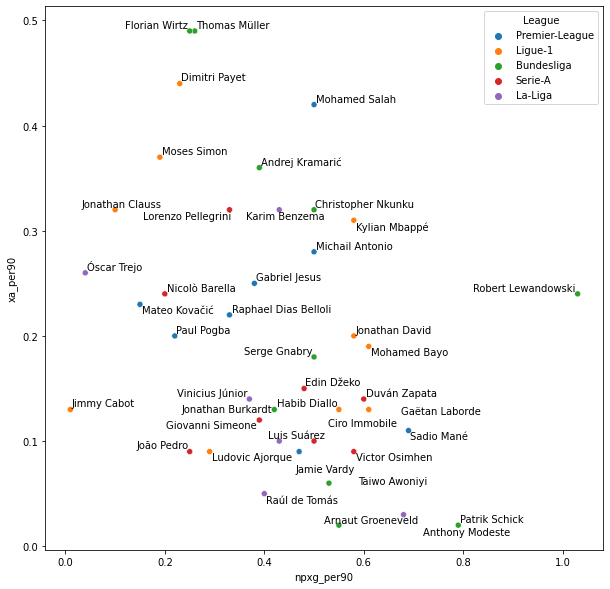

In [73]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x="npxg_per90",y="xa_per90", hue="League", data=dm_data2, ax=ax)
texts = [ax.text(dm_data2.npxg_per90.to_list()[i], dm_data2.xa_per90.to_list()[i], dm_data2.player.to_list()[i]) for i in range(len(dm_data2.player))]
adjust_text(texts)

In [54]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x="npxg_per90",y="xa_per90", hue="League", data=dm_data2, ax=ax)
texts = [ax.text(dm_data2.npxg_per90.to_list()[i], dm_data2.xa_per90.to_list()[i], dm_data2.player.to_list()[i]) for i in range(len(dm_data2.player))  if (dm_data2.npxg_per90.to_list()[i]>0.45) or (dm_data2.xa_per90.to_list()[i]>0.4)]
adjust_text(texts)

0.5